In [1]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',version=1)
#importing the dataset

In [2]:
print(mnist.data.shape, mnist.target.shape)
#We have 70K instances of digit and each instance is a 1*784 array

(70000, 784) (70000,)


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#lets plot a digit
X=np.array(mnist.data)
y=np.array(mnist.target, dtype=np.uint8)
some_digit=X[0].reshape(28, 28)

<class 'numpy.uint8'>


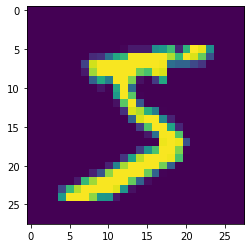

In [5]:
plt.imshow(some_digit)
print(type(y[0]))

In [6]:
#Splitting the data into training and testing data
X_train, X_test, y_train, y_test=X[:60000], X[60000:], y[:60000], y[60000:]
#or we can use sklearn train_test_split , but this data has already been stored in this pattern (first 60,000 for training , next 10,000 for testing)

In [7]:
#First we will be making a binary classifier

y_train_5 = (y_train == 5)
#Since we want the answer either true or false we are creating a vector with true and false y values, our predictor would predict
#True -> if it thinks it is 5
#False -> if it thinks it is not 5
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [8]:
some_digit=some_digit.reshape(-1, 28*28)
sgd_clf.predict(some_digit)

array([ True])

In [9]:
#Now we have to test the accuracy
from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold

Strat=StratifiedKFold(n_splits=5, random_state=42)
for train_index, test_index in Strat.split(X_train, y_train_5):
    clone_clf=clone(sgd_clf)
    X_train_fold=X_train[train_index]
    y_train_5_fold=y_train_5[train_index]
    X_test_fold=X_train[test_index]
    y_test_5_fold=y_train_5[test_index]

    clone_clf.fit(X_train_fold, y_train_5_fold)
    y_pred=clone_clf.predict(X_test_fold)
    n_correct=sum(y_pred == y_test_5_fold)
    print(f"accuracy :{n_correct/len(y_test_5_fold)}")

accuracy :0.9546666666666667
accuracy :0.96975
accuracy :0.9635
accuracy :0.9653333333333334
accuracy :0.9484166666666667


In [12]:
#Let's save our model first

import pickle
with open("sgd_classifier.sav", "wb") as dump_model:
    pickle.dump(sgd_clf, dump_model)

In [13]:
print(y_test_5_fold.shape)

(12000,)


In [32]:
from sklearn.model_selection import cross_val_predict

y_scores=cross_val_predict(sgd_clf, X_train, y_train_5, cv=5, method="decision_function")

In [33]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold =precision_recall_curve(y_train_5, y_scores)

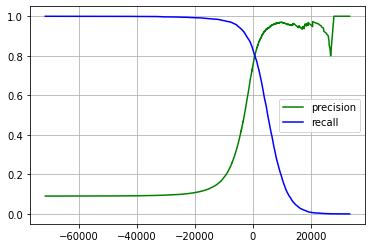

In [34]:
plt.plot(threshold, precision[:-1], "-g", label="precision")
plt.plot(threshold, recall[:-1], "-b", label="recall")
plt.grid()
plt.legend()